In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import RoutingClient
from numpy import arange

import matplotlib.pyplot as plt

from andbro__querrySeismoData import __querrySeismoData

In [ ]:
ipath = "/home/andbro/Documents/ROMY/data/"

In [ ]:
route = RoutingClient("eida-routing")

In [ ]:
bjz, bjz_inv = __querrySeismoData(
            seed_id="BW.ROMY.10.BJZ",
            starttime="2021-03-04 00:00",
            endtime="2021-03-05 00:00",
            where="local",
            path=ipath,
            restitute=True,
            detail=True,
)

In [ ]:
bjz.plot(type='dayplot');

In [ ]:
bjv, bjv_inv = __querrySeismoData(
            seed_id="BW.ROMY..BJV",
            starttime="2021-03-04 00:00",
            endtime="2021-03-05 00:00",
            where="local",
            path=ipath,
            restitute=True,
            detail=True,
)

In [ ]:
bjv.plot(type='dayplot');

In [ ]:
rlas, rlas_inv = __querrySeismoData(
            seed_id="BW.RLAS..BJZ",
            starttime="2021-03-04 00:00",
            endtime="2021-03-05 00:00",
            where="online",
            path=ipath,
            restitute=True,
            detail=True,
)

In [ ]:
rlas.plot(type='dayplot');

In [ ]:
tbeg=UTCDateTime("2021-03-04 12:00")
tend=UTCDateTime("2021-03-05 00:00")

rlas.trim(tbeg, tend)
bjz.trim(tbeg, tend)
bjv.trim(tbeg, tend)

In [ ]:
rlas.filter('lowpass', freq=1, corners=4, zerophase=True)
bjz.filter('lowpass', freq=1, corners=4, zerophase=True)
bjv.filter('lowpass', freq=1, corners=4, zerophase=True)


In [ ]:
rlas.plot();
bjz.plot();
bjv.plot();


In [ ]:
def __makeplot_traces():

    fig, ax = plt.subplots(3, 1, figsize=(15,10), sharex=True)

    font = 14

    ztimeline = arange(0, bjz[0].stats.delta*bjz[0].stats.npts, bjz[0].stats.delta)
    vtimeline = arange(0, bjv[0].stats.delta*bjv[0].stats.npts, bjv[0].stats.delta)

    ax[0].plot(ztimeline/60, rlas[0].data, label="RLAS")

    ax[1].plot(ztimeline/60, bjz[0].data, label="ROMY Z")

    ax[2].plot(vtimeline/60, bjv[0].data, label="ROMY V")


    ax[0].legend(loc="upper right", fontsize=font-1)
    ax[1].legend(loc="upper right", fontsize=font-1)
    ax[2].legend(loc="upper right", fontsize=font-1)

    ax[2].set_xlabel(f"Time from {bjz[0].stats.starttime.date} {str(bjz[0].stats.starttime.time)[0:9]} UTC (min)", fontsize=font)
        
    ax[0].set_ylabel("rot. rate (rad/s)", fontsize=font)
    ax[1].set_ylabel("rot. rate (rad/s)", fontsize=font)
    ax[2].set_ylabel("rot. rate (rad/s)", fontsize=font)
    
    plt.show();

    return fig


fig = __makeplot_traces();

In [ ]:
from andbro__save_to import __save_to
from andbro__savefig import __savefig

__save_to([fig])

In [ ]:
bjz.plot(type='dayplot');
bjv.plot(type='dayplot');
rlas.plot(type='dayplot');

## New Section

In [9]:
tbeg = UTCDateTime("2021-03-04 18:43")
tend = UTCDateTime("2021-03-04 18:53")

In [10]:
bjz, bjz_inv = __querrySeismoData(
            seed_id="BW.ROMY.10.BJZ",
            starttime=tbeg,
            endtime=tend,
            where="george",
            path=None,
            restitute=True,
            detail=True,
)

bjz.trim(tbeg, tend)

['OUT: VEL', 'pre-filter: [0.001, 0.005, 45, 50]']


1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2021-03-04T18:43:00.005800Z - 2021-03-04T18:53:00.005800Z | 20.0 Hz, 12001 samples

In [11]:
rlas, rlas_inv = __querrySeismoData(
            seed_id="BW.RLAS..BJZ",
            starttime=tbeg,
            endtime=tend,
            where="online",
            path=None,
            restitute=True,
            detail=True,
)
rlas.trim(tbeg, tend)

['RoutingClient: {route}', 'OUT: VEL', 'pre-filter: [0.001, 0.005, 45, 50]']


/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/core/inventory/response.py:1193: UserWarning: The unit 'RAD/S' is not known to ObsPy. It will be assumed to be displacement for the calculations. This mostly does the right thing but please proceed with caution.
  warnings.warn(msg)


1 Trace(s) in Stream:
BW.RLAS..BJZ | 2021-03-04T18:43:00.009250Z - 2021-03-04T18:53:00.009250Z | 20.0 Hz, 12001 samples

In [16]:
f_upper=0.1


rlas.filter("lowpass", freq=f_upper, corners=8, zerophase=True)
bjz.filter("lowpass", freq=f_upper, corners=8, zerophase=True)

1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2021-03-04T18:43:00.005800Z - 2021-03-04T18:53:00.005800Z | 20.0 Hz, 12001 samples

(0.0, 1.0)

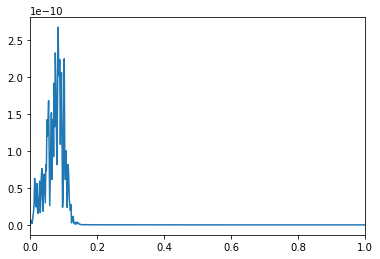

In [17]:
from andbro__fft import __fft

asd, f = __fft(bjz[0].data, bjz[0].stats.delta)

plt.plot(f, asd)
plt.xlim(0,1)

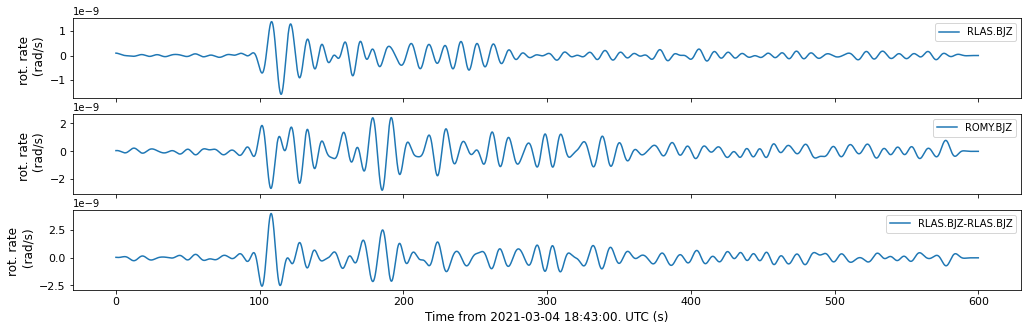

In [18]:
from andbro__makeplot_compare2traces import __makeplot_compare2traces

__makeplot_compare2traces(rlas, bjz);

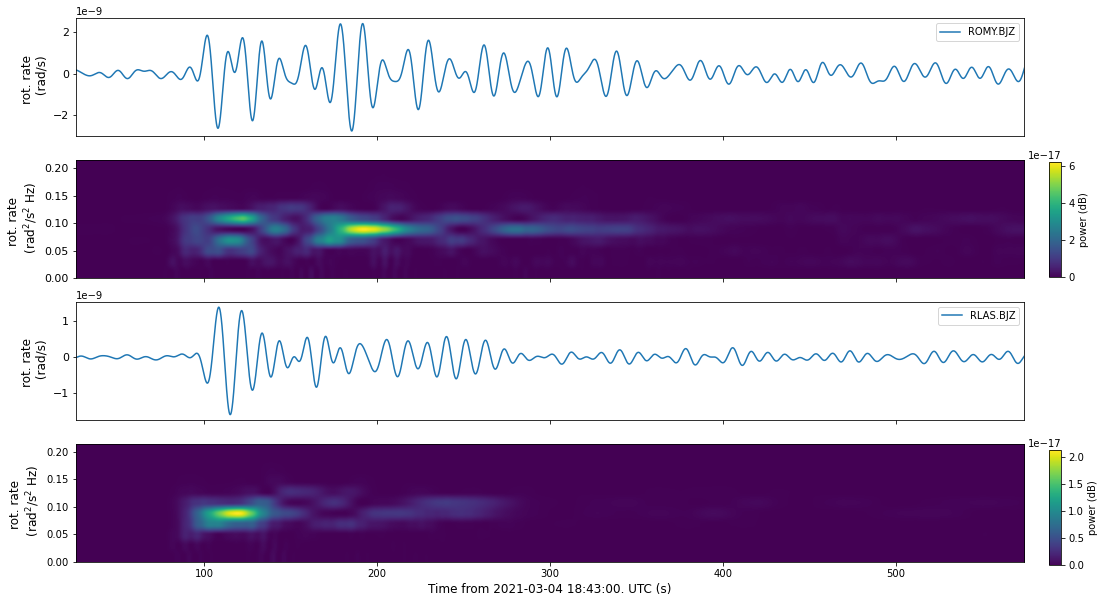

In [19]:
from andbro__makeplot_traces_spectrogram import __makeplot_traces_spectrogram

__makeplot_traces_spectrogram(bjz, rlas, f_upper, spec_param=(1024, 1024, 1023));